In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data tiding and cleaning

## Dataset - *pew.csv* 

Dataset that presents what selary is taking each religion.

Reading the file using pandas:

In [422]:
saleries_per_religion = pd.read_csv('data/pew.csv')

In [423]:
saleries_per_religion

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


Show the data in the format
- display religion as a first column
- then salary bucket as a second column
- for each value there is a separate row

In [424]:
saleries_per_religion_tidy = saleries_per_religion.melt(id_vars = ["religion"], var_name = "income", value_name = "frequency")

In [425]:
saleries_per_religion_tidy

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [426]:
saleries_per_religion_tidy.columns

Index(['religion', 'income', 'frequency'], dtype='object')

The original dataset is not affected:

In [427]:
saleries_per_religion.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

Changing to category - saves memory if the data is not too large.

In [428]:
saleries_per_religion_tidy.religion = saleries_per_religion_tidy.religion.astype("category")
saleries_per_religion_tidy.income = saleries_per_religion_tidy.income.astype("category")

In [429]:
saleries_per_religion_tidy.dtypes

religion     category
income       category
frequency       int64
dtype: object

In [430]:
saleries_per_religion_tidy.memory_usage()

Index         132
religion      880
income        560
frequency    1440
dtype: int64

In [431]:
saleries_per_religion_tidy.religion.value_counts()

religion
Agnostic                   10
Atheist                    10
Other World Religions      10
Other Faiths               10
Other Christian            10
Orthodox                   10
Muslim                     10
Mormon                     10
Mainline Prot              10
Jewish                     10
Jehovah's Witness          10
Historically Black Prot    10
Hindu                      10
Evangelical Prot           10
Don’t know/refused         10
Catholic                   10
Buddhist                   10
Unaffiliated               10
Name: count, dtype: int64

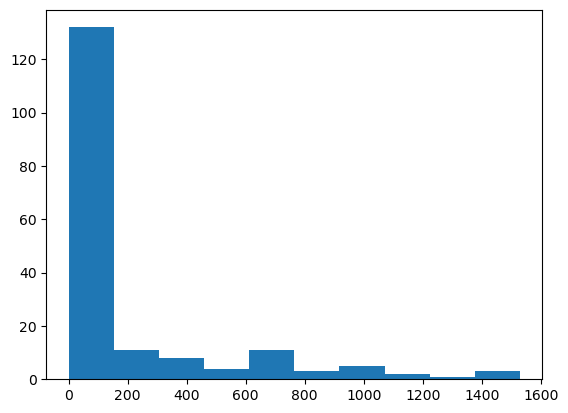

In [432]:
plt.hist(saleries_per_religion_tidy.frequency)
plt.show()

## Dataset - *tb.csv* 

Dataset that presents tuberculose.

In [433]:
tb = pd.read_csv('data/tb.csv')

In [434]:
tb

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [435]:
tb.shape

(5769, 22)

In [436]:
tb.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

In [437]:
tb[(tb.year == 1989) & (tb.iso2 == "AD")].values

array([['AD', 1989, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=object)

In [438]:
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5769.0,1994.229329,8.423265,1980.0,1987.0,1994.0,2002.00,2008.0
m04,392.0,8.806122,46.094789,0.0,0.0,0.0,2.00,655.0
m514,401.0,28.975062,127.881505,0.0,0.0,1.0,8.00,1519.0
m014,2381.0,79.438051,280.489536,0.0,0.0,6.0,36.00,4648.0
m1524,2407.0,922.364769,4278.638975,0.0,10.0,92.0,511.50,77121.0
m2534,2408.0,1301.894518,5253.398971,0.0,15.0,151.5,728.00,83850.0
m3544,2415.0,1205.566046,5409.064589,0.0,16.0,134.0,591.50,90498.0
m4554,2421.0,983.515489,4780.782748,0.0,13.0,98.0,434.00,78815.0
m5564,2414.0,696.171914,3771.934518,0.0,9.0,62.0,273.75,57492.0
m65,2408.0,609.440615,3660.224592,0.0,8.0,53.0,227.25,70376.0


In [439]:
tb_tidy = tb.melt(id_vars = ["iso2", "year"], var_name = "sex_and_age", value_name = "cases")

In [440]:
tb_tidy

,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN
...,...,...,...,...
115375,ZW,2004,fu,NaN
115376,ZW,2005,fu,NaN
115377,ZW,2006,fu,NaN
115378,ZW,2007,fu,NaN


In [441]:
tb_tidy.head()

,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN


In [442]:
tb_tidy.sex_and_age.str.slice(0, 1)

0         m
1         m
2         m
3         m
4         m
         ..
115375    f
115376    f
115377    f
115378    f
115379    f
Name: sex_and_age, Length: 115380, dtype: object

In [443]:
tb_tidy.sex_and_age.str.slice(0, 1).unique()

array(['m', 'f'], dtype=object)

In [444]:
tb_tidy.sex_and_age.str.slice(1)

0         04
1         04
2         04
3         04
4         04
          ..
115375     u
115376     u
115377     u
115378     u
115379     u
Name: sex_and_age, Length: 115380, dtype: object

In [445]:
tb_tidy.sex_and_age.str.slice(1).unique()

array(['04', '514', '014', '1524', '2534', '3544', '4554', '5564', '65',
       'u'], dtype=object)

In [446]:
tb_tidy['gender'] = tb_tidy.sex_and_age.str.slice(0, 1)

In [447]:
tb_tidy

,iso2,year,sex_and_age,cases,gender
0,AD,1989,m04,NaN,m
1,AD,1990,m04,NaN,m
2,AD,1991,m04,NaN,m
3,AD,1992,m04,NaN,m
4,AD,1993,m04,NaN,m
...,...,...,...,...,...
115375,ZW,2004,fu,NaN,f
115376,ZW,2005,fu,NaN,f
115377,ZW,2006,fu,NaN,f
115378,ZW,2007,fu,NaN,f


In [448]:
tb_tidy['age_group'] = tb_tidy.sex_and_age.str.slice(1)

In [449]:
tb_tidy

,iso2,year,sex_and_age,cases,gender,age_group
0,AD,1989,m04,NaN,m,04
1,AD,1990,m04,NaN,m,04
2,AD,1991,m04,NaN,m,04
3,AD,1992,m04,NaN,m,04
4,AD,1993,m04,NaN,m,04
...,...,...,...,...,...,...
115375,ZW,2004,fu,NaN,f,u
115376,ZW,2005,fu,NaN,f,u
115377,ZW,2006,fu,NaN,f,u
115378,ZW,2007,fu,NaN,f,u


In [450]:
tb_tidy

,iso2,year,sex_and_age,cases,gender,age_group
0,AD,1989,m04,NaN,m,04
1,AD,1990,m04,NaN,m,04
2,AD,1991,m04,NaN,m,04
3,AD,1992,m04,NaN,m,04
4,AD,1993,m04,NaN,m,04
...,...,...,...,...,...,...
115375,ZW,2004,fu,NaN,f,u
115376,ZW,2005,fu,NaN,f,u
115377,ZW,2006,fu,NaN,f,u
115378,ZW,2007,fu,NaN,f,u


In [451]:
tb_tidy = tb_tidy.drop(columns = ["sex_and_age"])

In [452]:
tb_tidy

,iso2,year,cases,gender,age_group
0,AD,1989,NaN,m,04
1,AD,1990,NaN,m,04
2,AD,1991,NaN,m,04
3,AD,1992,NaN,m,04
4,AD,1993,NaN,m,04
...,...,...,...,...,...
115375,ZW,2004,NaN,f,u
115376,ZW,2005,NaN,f,u
115377,ZW,2006,NaN,f,u
115378,ZW,2007,NaN,f,u


In [453]:
tb_tidy_no_missing = tb_tidy.dropna()

In [454]:
tb_tidy_no_missing

,iso2,year,cases,gender,age_group
15,AD,2005,0.0,m,04
16,AD,2006,0.0,m,04
18,AD,2008,0.0,m,04
42,AE,2006,0.0,m,04
43,AE,2007,0.0,m,04
...,...,...,...,...,...
115195,VU,2008,0.0,f,u
115269,YE,2008,0.0,f,u
115323,ZA,2008,0.0,f,u
115350,ZM,2008,0.0,f,u


In [455]:
tb_tidy_no_missing.cases.mean()

611.1249437443745

In [456]:
tb_tidy_no_missing[tb_tidy_no_missing.iso2 == "BG"].cases.mean()

58.46478873239437

In [457]:
tb_tidy_no_missing.age_group.str.len().value_counts()


age_group
4    23912
2     5561
3     5536
1      543
Name: count, dtype: int64

In [458]:
tb_tidy_no_missing.age_group.str.slice(0, 2)

15        04
16        04
18        04
42        04
43        04
          ..
115195     u
115269     u
115323     u
115350     u
115379     u
Name: age_group, Length: 35552, dtype: object

In [459]:
def process_age_group(age_group):
  ages = {"04": "0-4", "65": "65+", "u": "unknown"}
  if age_group in ages:
    return ages[age_group]
  else:
    # Put a dash before the last two digits
    return f"{age_group[:-2]}-{age_group[-2:]}"

In [460]:
tb_tidy_no_missing.age_group.apply(lambda x: process_age_group(x))

15            0-4
16            0-4
18            0-4
42            0-4
43            0-4
           ...   
115195    unknown
115269    unknown
115323    unknown
115350    unknown
115379    unknown
Name: age_group, Length: 35552, dtype: object

In [461]:
tb_tidy_no_missing.age_group.unique()

array(['04', '514', '014', '1524', '2534', '3544', '4554', '5564', '65',
       'u'], dtype=object)

In [462]:
tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.apply(lambda x: process_age_group(x))

/var/folders/mg/trjr_9p9323_hk8_lkjbvyj80000gn/T/ipykernel_57020/2764644840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.apply(lambda x: process_age_group(x))


In [463]:
tb_tidy_no_missing

,iso2,year,cases,gender,age_group
15,AD,2005,0.0,m,0-4
16,AD,2006,0.0,m,0-4
18,AD,2008,0.0,m,0-4
42,AE,2006,0.0,m,0-4
43,AE,2007,0.0,m,0-4
...,...,...,...,...,...
115195,VU,2008,0.0,f,unknown
115269,YE,2008,0.0,f,unknown
115323,ZA,2008,0.0,f,unknown
115350,ZM,2008,0.0,f,unknown


In [464]:
tb_tidy_no_missing = tb_tidy_no_missing[["iso2", "year", "gender", "age_group", "cases"]]

In [465]:
tb_tidy_no_missing

,iso2,year,gender,age_group,cases
15,AD,2005,m,0-4,0.0
16,AD,2006,m,0-4,0.0
18,AD,2008,m,0-4,0.0
42,AE,2006,m,0-4,0.0
43,AE,2007,m,0-4,0.0
...,...,...,...,...,...
115195,VU,2008,f,unknown,0.0
115269,YE,2008,f,unknown,0.0
115323,ZA,2008,f,unknown,0.0
115350,ZM,2008,f,unknown,0.0


In [466]:
tb_tidy_no_missing = tb_tidy_no_missing.sort_values(["iso2", "year"])

In [467]:
tb_tidy_no_missing

,iso2,year,gender,age_group,cases
11544,AD,1996,m,0-14,0.0
17313,AD,1996,m,15-24,0.0
23082,AD,1996,m,25-34,0.0
28851,AD,1996,m,35-44,4.0
34620,AD,1996,m,45-54,1.0
...,...,...,...,...,...
92303,ZW,2008,f,35-44,2890.0
98072,ZW,2008,f,45-54,467.0
103841,ZW,2008,f,55-64,174.0
109610,ZW,2008,f,65+,105.0


In [468]:
tb_tidy_no_missing = tb_tidy_no_missing.reset_index(drop = True)

In [469]:
tb_tidy_no_missing

,iso2,year,gender,age_group,cases
0,AD,1996,m,0-14,0.0
1,AD,1996,m,15-24,0.0
2,AD,1996,m,25-34,0.0
3,AD,1996,m,35-44,4.0
4,AD,1996,m,45-54,1.0
...,...,...,...,...,...
35547,ZW,2008,f,35-44,2890.0
35548,ZW,2008,f,45-54,467.0
35549,ZW,2008,f,55-64,174.0
35550,ZW,2008,f,65+,105.0


In [470]:
tb_tidy_no_missing.cases = tb_tidy_no_missing.cases.astype(int)

In [471]:
tb_tidy_no_missing

,iso2,year,gender,age_group,cases
0,AD,1996,m,0-14,0
1,AD,1996,m,15-24,0
2,AD,1996,m,25-34,0
3,AD,1996,m,35-44,4
4,AD,1996,m,45-54,1
...,...,...,...,...,...
35547,ZW,2008,f,35-44,2890
35548,ZW,2008,f,45-54,467
35549,ZW,2008,f,55-64,174
35550,ZW,2008,f,65+,105


In [472]:
tb_tidy_no_missing.to_csv("data/tb_tidy_no_missing.csv", index = False)

## Dataset - *weather.csv* 

In [578]:
weather_data = pd.read_csv('data/weather.csv')

In [579]:
weather_data

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [580]:
weather_data_tidy = weather_data.melt(id_vars = ["id", "year", "month", "element"], var_name = "day")

In [581]:
weather_data_tidy

,id,year,month,element,day,value
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [582]:
weather_data_tidy.day.unique()

array(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11',
       'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20',
       'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29',
       'd30', 'd31'], dtype=object)

In [583]:
weather_data_tidy.day = weather_data_tidy.day.str.slice(1).astype(int)

In [584]:
weather_data_tidy

,id,year,month,element,day,value
0,MX17004,2010,1,tmax,1,NaN
1,MX17004,2010,1,tmin,1,NaN
2,MX17004,2010,2,tmax,1,NaN
3,MX17004,2010,2,tmin,1,NaN
4,MX17004,2010,3,tmax,1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,31,NaN
678,MX17004,2010,11,tmax,31,NaN
679,MX17004,2010,11,tmin,31,NaN
680,MX17004,2010,12,tmax,31,NaN


In [586]:
weather_data_tidy = weather_data_tidy.dropna()

In [587]:
weather_data_tidy

,id,year,month,element,day,value
20,MX17004,2010,12,tmax,1,29.9
21,MX17004,2010,12,tmin,1,13.8
24,MX17004,2010,2,tmax,2,27.3
25,MX17004,2010,2,tmin,2,14.4
40,MX17004,2010,11,tmax,2,31.3
...,...,...,...,...,...,...
631,MX17004,2010,8,tmin,29,15.3
638,MX17004,2010,1,tmax,30,27.8
639,MX17004,2010,1,tmin,30,14.5
674,MX17004,2010,8,tmax,31,25.4


In [588]:
weather_data_tidy = weather_data_tidy.pivot_table(index = ["id", "year", "month", "day"], columns = "element", values = "value")

In [590]:
weather_data_tidy

element                 tmax  tmin
id      year month day            
MX17004 2010 1     30   27.8  14.5
             2     2    27.3  14.4
                   3    24.1  14.4
                   11   29.7  13.4
                   23   29.9  10.7
             3     5    32.1  14.2
                   10   34.5  16.8
                   16   31.1  17.6
             4     27   36.3  16.7
             5     27   33.2  18.2
             6     17   28.0  17.5
                   29   30.1  18.0
             7     3    28.6  17.5
                   14   29.9  16.5
             8     5    29.6  15.8
                   8    29.0  17.3
                   13   29.8  16.5
                   23   26.4  15.0
                   25   29.7  15.6
                   29   28.0  15.3
                   31   25.4  15.4
             10    5    27.0  14.0
                   7    28.1  12.9
                   14   29.5  13.0
                   15   28.7  10.5
                   28   31.2  15.0
             11    2    31.3  16.3
                   4    27.2  12.0
                   5    26.3   7.9
                   26   28.1  12.1
                   27   27.7  14.2
             12    1    29.9  13.8
                   6    27.8  10.5

In [591]:
weather_data_tidy = weather_data_tidy.reset_index()

In [592]:
weather_data_tidy

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,30,27.8,14.5
1,MX17004,2010,2,2,27.3,14.4
2,MX17004,2010,2,3,24.1,14.4
3,MX17004,2010,2,11,29.7,13.4
4,MX17004,2010,2,23,29.9,10.7
5,MX17004,2010,3,5,32.1,14.2
6,MX17004,2010,3,10,34.5,16.8
7,MX17004,2010,3,16,31.1,17.6
8,MX17004,2010,4,27,36.3,16.7
9,MX17004,2010,5,27,33.2,18.2


In [594]:
 weather_data_tidy["date"] = pd.to_datetime(weather_data_tidy[["year", "month", "day"]])

In [595]:
weather_data_tidy

element,id,year,month,day,tmax,tmin,date
0,MX17004,2010,1,30,27.8,14.5,2010-01-30
1,MX17004,2010,2,2,27.3,14.4,2010-02-02
2,MX17004,2010,2,3,24.1,14.4,2010-02-03
3,MX17004,2010,2,11,29.7,13.4,2010-02-11
4,MX17004,2010,2,23,29.9,10.7,2010-02-23
5,MX17004,2010,3,5,32.1,14.2,2010-03-05
6,MX17004,2010,3,10,34.5,16.8,2010-03-10
7,MX17004,2010,3,16,31.1,17.6,2010-03-16
8,MX17004,2010,4,27,36.3,16.7,2010-04-27
9,MX17004,2010,5,27,33.2,18.2,2010-05-27


In [596]:
weather_data_tidy.drop(columns = ["year", "month", "day"], inplace = True)

In [597]:
weather_data_tidy

element,id,tmax,tmin,date
0,MX17004,27.8,14.5,2010-01-30
1,MX17004,27.3,14.4,2010-02-02
2,MX17004,24.1,14.4,2010-02-03
3,MX17004,29.7,13.4,2010-02-11
4,MX17004,29.9,10.7,2010-02-23
5,MX17004,32.1,14.2,2010-03-05
6,MX17004,34.5,16.8,2010-03-10
7,MX17004,31.1,17.6,2010-03-16
8,MX17004,36.3,16.7,2010-04-27
9,MX17004,33.2,18.2,2010-05-27


## Dataset - *bilboard.csv* 

In [686]:
bilboard_data = pd.read_csv('data/billboard.csv')

In [687]:
bilboard_data

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [688]:
bilboard_data[bilboard_data.wk65.notna()]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
62,2000,Creed,Higher,5:16,1999-09-11,81,77.0,73.0,63.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [648]:
bilboard_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,317.0,2000.000000,0.000000,2000.0,2000.00,2000.0,2000.0,2000.0
wk1,317.0,79.958991,14.686865,15.0,74.00,81.0,91.0,100.0
wk2,312.0,71.173077,18.200443,8.0,63.00,73.0,84.0,100.0
wk3,307.0,65.045603,20.752302,6.0,53.00,66.0,79.0,100.0
wk4,300.0,59.763333,22.324619,5.0,44.75,61.0,76.0,100.0
...,...,...,...,...,...,...,...,...
wk72,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk74,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk75,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [690]:
bilboard_data.columns[-15:]

Index(['wk62', 'wk63', 'wk64', 'wk65', 'wk66', 'wk67', 'wk68', 'wk69', 'wk70',
       'wk71', 'wk72', 'wk73', 'wk74', 'wk75', 'wk76'],
      dtype='object')

In [691]:
bilboard_data[bilboard_data.columns[-15:]].describe().T

,count,mean,std,min,25%,50%,75%,max
wk62,2.0,44.5,3.535534,42.0,43.25,44.5,45.75,47.0
wk63,2.0,47.5,3.535534,45.0,46.25,47.5,48.75,50.0
wk64,2.0,50.0,0.000000,50.0,50.00,50.0,50.00,50.0
wk65,1.0,49.0,NaN,49.0,49.00,49.0,49.00,49.0
wk66,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk67,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk68,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk71,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [692]:
bilboard_data_tidy = bilboard_data.melt(
  id_vars = ["year",	"artist",	"track",	"time",	"date.entered"], 
  var_name = "week", 
  value_name = "position"
)

In [693]:
bilboard_data_tidy

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [694]:
bilboard_data_tidy = bilboard_data_tidy.dropna()

In [695]:
bilboard_data_tidy

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,wk63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,wk63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,wk64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,wk64,50.0


In [696]:
bilboard_data_tidy.week.unique()

array(['wk1', 'wk2', 'wk3', 'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9',
       'wk10', 'wk11', 'wk12', 'wk13', 'wk14', 'wk15', 'wk16', 'wk17',
       'wk18', 'wk19', 'wk20', 'wk21', 'wk22', 'wk23', 'wk24', 'wk25',
       'wk26', 'wk27', 'wk28', 'wk29', 'wk30', 'wk31', 'wk32', 'wk33',
       'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39', 'wk40', 'wk41',
       'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48', 'wk49',
       'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65'],
      dtype=object)

In [697]:
bilboard_data_tidy.week = bilboard_data_tidy.week.str.slice(2).astype(int)

/var/folders/mg/trjr_9p9323_hk8_lkjbvyj80000gn/T/ipykernel_57020/1153220242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilboard_data_tidy.week = bilboard_data_tidy.week.str.slice(2).astype(int)


In [698]:
bilboard_data_tidy

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50.0


In [699]:
bilboard_data_tidy.dtypes

year              int64
artist           object
track            object
time             object
date.entered     object
week              int64
position        float64
dtype: object

In [700]:
bilboard_data_tidy.position = bilboard_data_tidy.position.astype(int)

/var/folders/mg/trjr_9p9323_hk8_lkjbvyj80000gn/T/ipykernel_57020/1293865065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilboard_data_tidy.position = bilboard_data_tidy.position.astype(int)


In [701]:
bilboard_data_tidy

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45
20033,2000,Creed,Higher,5:16,1999-09-11,64,50
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50


In [702]:
bilboard_data_tidy.dtypes

year             int64
artist          object
track           object
time            object
date.entered    object
week             int64
position         int64
dtype: object

In [703]:
bilboard_data_tidy["date.entered"] = pd.to_datetime(bilboard_data_tidy["date.entered"])

/var/folders/mg/trjr_9p9323_hk8_lkjbvyj80000gn/T/ipykernel_57020/4141712779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilboard_data_tidy["date.entered"] = pd.to_datetime(bilboard_data_tidy["date.entered"])


In [704]:
bilboard_data_tidy.dtypes

year                     int64
artist                  object
track                   object
time                    object
date.entered    datetime64[ns]
week                     int64
position                 int64
dtype: object

In [705]:
pd.Timedelta(days = 7)

Timedelta('7 days 00:00:00')

In [706]:
intervals = bilboard_data_tidy.week.apply(lambda x: pd.Timedelta(x - 1, "w"))

In [707]:
bilboard_data_tidy

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45
20033,2000,Creed,Higher,5:16,1999-09-11,64,50
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50


In [708]:
bilboard_data_tidy["date"] = bilboard_data_tidy["date.entered"] + intervals

/var/folders/mg/trjr_9p9323_hk8_lkjbvyj80000gn/T/ipykernel_57020/3236659488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilboard_data_tidy["date"] = bilboard_data_tidy["date.entered"] + intervals


In [709]:
bilboard_data_tidy

,year,artist,track,time,date.entered,week,position,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57,2000-04-15
...,...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50,2000-11-18
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45,2000-08-12
20033,2000,Creed,Higher,5:16,1999-09-11,64,50,2000-11-25
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50,2000-08-19


In [710]:
bilboard_data_tidy.drop(columns = ["date.entered", "week"], inplace = True)

/var/folders/mg/trjr_9p9323_hk8_lkjbvyj80000gn/T/ipykernel_57020/1511523314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilboard_data_tidy.drop(columns = ["date.entered", "week"], inplace = True)


In [711]:
bilboard_data_tidy

,year,artist,track,time,position,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,57,2000-04-15
...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,50,2000-11-18
19833,2000,Lonestar,Amazed,4:25,45,2000-08-12
20033,2000,Creed,Higher,5:16,50,2000-11-25
20150,2000,Lonestar,Amazed,4:25,50,2000-08-19


In [712]:
bilboard_data_tidy = bilboard_data_tidy[['year', 'artist', 'track', 'time', 'date', 'position']]

In [713]:
bilboard_data_tidy

,year,artist,track,time,date,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57
...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,2000-11-18,50
19833,2000,Lonestar,Amazed,4:25,2000-08-12,45
20033,2000,Creed,Higher,5:16,2000-11-25,50
20150,2000,Lonestar,Amazed,4:25,2000-08-19,50


In [714]:
bilboard_data_tidy[bilboard_data_tidy.track == "Higher"]

,year,artist,track,time,date,position
62,2000,Creed,Higher,5:16,1999-09-11,81
379,2000,Creed,Higher,5:16,1999-09-18,77
696,2000,Creed,Higher,5:16,1999-09-25,73
1013,2000,Creed,Higher,5:16,1999-10-02,63
1330,2000,Creed,Higher,5:16,1999-10-09,61
1647,2000,Creed,Higher,5:16,1999-10-16,58
1964,2000,Creed,Higher,5:16,1999-10-23,56
2281,2000,Creed,Higher,5:16,1999-10-30,52
2598,2000,Creed,Higher,5:16,1999-11-06,56
2915,2000,Creed,Higher,5:16,1999-11-13,57


In [715]:
bilboard_data_tidy.groupby(["track", "artist"]).value_counts()

track                    artist         year  time  date        position
(Hot S**t) Country G...  Nelly          2000  4:17  2000-04-29  100         1
                                                    2000-05-06  99          1
                                                    2000-05-13  96          1
                                                    2000-05-20  76          1
                                                    2000-05-27  55          1
                                                                           ..
www.memory               Jackson, Alan  2000  2:36  2001-01-13  63          1
                                                    2001-01-20  67          1
                                                    2001-01-27  77          1
                                                    2001-02-03  89          1
                                                    2001-02-10  99          1
Name: count, Length: 5307, dtype: int64

In [716]:
bilboard_data_tidy = bilboard_data_tidy.reset_index(drop = True)

In [717]:
bilboard_data_tidy

,year,artist,track,time,date,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57
...,...,...,...,...,...,...
5302,2000,Creed,Higher,5:16,2000-11-18,50
5303,2000,Lonestar,Amazed,4:25,2000-08-12,45
5304,2000,Creed,Higher,5:16,2000-11-25,50
5305,2000,Lonestar,Amazed,4:25,2000-08-19,50


In [718]:
bilboard_data_tidy[bilboard_data_tidy.position == 1].artist.unique()

array(['Madonna', 'Aguilera, Christina', 'Sisqo', "Destiny's Child",
       'Santana', 'Carey, Mariah', 'Janet', 'Iglesias, Enrique', "N'Sync",
       'matchbox twenty', 'Aaliyah', 'Savage Garden', 'Vertical Horizon',
       'Creed', 'Lonestar'], dtype=object)

In [721]:
bilboard_data_tidy[bilboard_data_tidy.position == 1].artist.value_counts()

artist
Destiny's Child        14
Santana                10
Aguilera, Christina     6
Madonna                 4
Savage Garden           4
Janet                   3
Iglesias, Enrique       3
Sisqo                   2
N'Sync                  2
Lonestar                2
Carey, Mariah           1
matchbox twenty         1
Aaliyah                 1
Vertical Horizon        1
Creed                   1
Name: count, dtype: int64